In [1]:
library(Seurat)
library(tidyverse)
library(ggplot2)
library(patchwork)
library(forcats)
library(Polychrome)
library(grid)

Attaching SeuratObject

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
xenium.obj = qs::qread('230502_xenium_sct_unimapped_cca.qs')
xenium.obj

An object of class Seurat 
554 features across 78054 samples within 6 assays 
Active assay: SCT (100 features, 100 variable features)
 5 other assays present: Xenium, BlankCodeword, ControlCodeword, ControlProbe, prediction.score.labels
 3 dimensional reductions calculated: umap, cca, ref.umap
 8 spatial fields of view present: fov fov.1 fov.2 fov.3 fov.4 fov.5 fov.6 fov.7

In [3]:
rownames(xenium.obj)

[1] "Sorcs1"   "Lingo2"   "Cntn4"    "Tenm2"    "Sox5"     "Ptprd"   
  [7] "Robo1"    "Plcl1"    "Oxr1"     "Plxdc2"   "Plp1"     "Kirrel3" 
 [13] "Mgat4c"   "Tenm3"    "Slit2"    "Nrg3"     "Hdac9"    "Col25a1" 
 [19] "Ncam2"    "Rbfox1"   "Fgf13"    "Pde10a"   "Deptor"   "Alcam"   
 [25] "Gria1"    "Grid2"    "Fam155a"  "Grm7"     "Agrp"     "Naaladl2"
 [31] "Ntm"      "Gpc5"     "Hs3st4"   "Lef1"     "Erbb4"    "Kctd16"  
 [37] "Zfhx3"    "Gtdc1"    "Pdgfra"   "Nrg1"     "Macrod2"  "Gpc6"    
 [43] "Pcdh11x"  "Kcnip4"   "Brinp3"   "Cadm2"    "Pde4b"    "Fhit"    
 [49] "Rgs6"     "Prkg1"    "Dlg2"     "Ptprk"    "Luzp2"    "Ptprt"   
 [55] "Nxph1"    "Kcnq3"    "Lrmda"    "Dcc"      "Cntn5"    "Adarb2"  
 [61] "Gabrg3"   "Rmst"     "Lrp1b"    "Trpm3"    "P3h2"     "Prr16"   
 [67] "Prkca"    "Nrxn3"    "Aqp4"     "Ctnna2"   "Inpp4b"   "Sgcz"    
 [73] "Fat3"     "Plcb1"    "Cacna2d3" "Bmp4"     "Tox"      "Car10"   
 [79] "Nkain2"   "Galntl6"  "Slc7a11"  "Pcdh9"    "Slc1a2"   "Pdzrn3"  
 [85] "Rax"      "Pomc"     "Zfp804b"  "Wwox"     "Pcdh7"    "Grm8"    
 [91] "Rtl4"     "Il1rapl2" "Sgcd"     "Egfem1"   "Arhgap6"  "Immp2l"  
 [97] "Cfap299"  "Htr3b"    "Csmd1"    "Lmx1a"

In [2]:
obj_fgf1 = qs::qread('obj_fgf1_obob5v5.qs')
obj_fgf1

An object of class Seurat 
58613 features across 58235 samples within 3 assays 
Active assay: SCT (26292 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

Warning message:
“ggrepel: 31 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 19 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


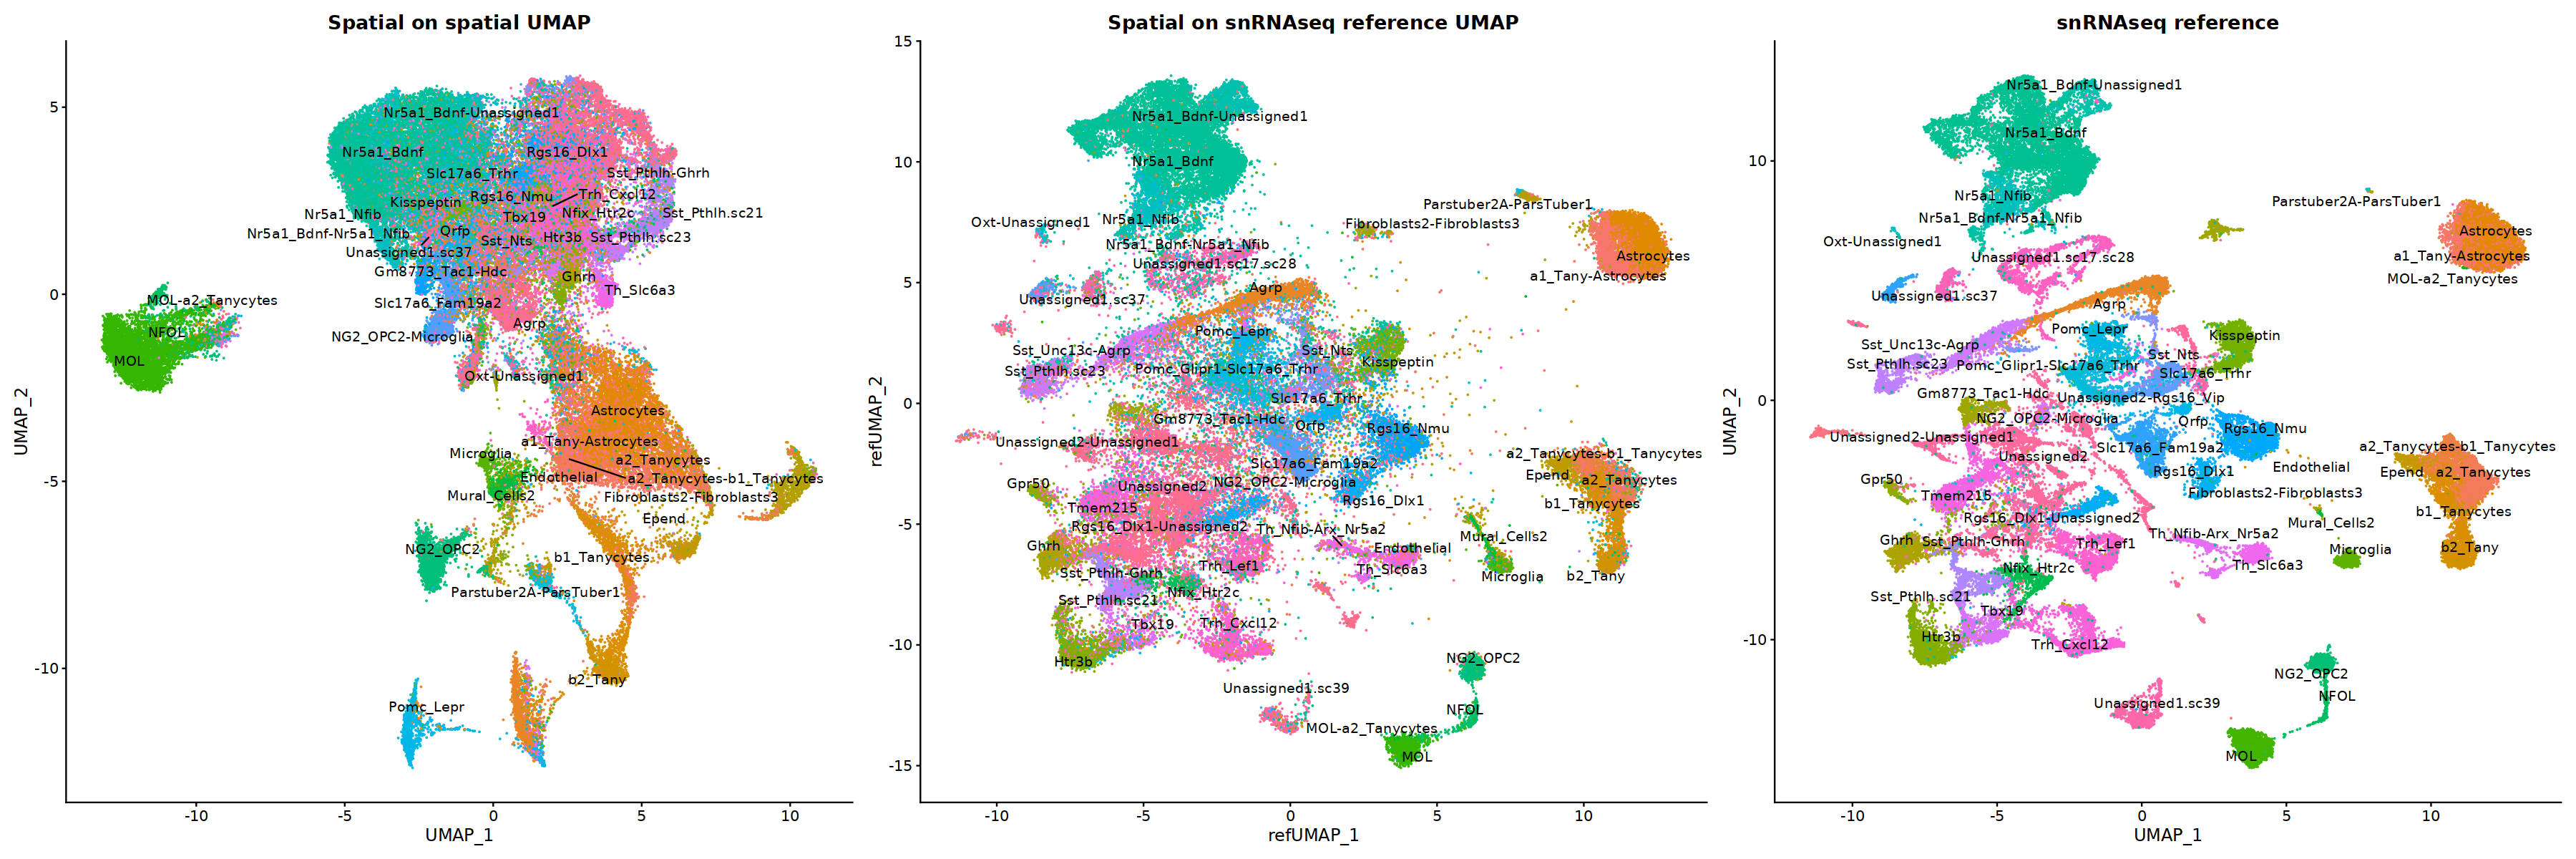

In [7]:
options(repr.plot.width=20, repr.plot.height=20)
p1 = DimPlot(xenium.obj, reduction = "umap", group.by = "predicted.labels", label = TRUE, repel = TRUE) + theme(legend.position = "none")  + labs(title = "Spatial on spatial UMAP")
p2 = DimPlot(xenium.obj, reduction = "ref.umap", group.by = "predicted.labels", label = TRUE, repel = TRUE) + theme(legend.position = "none") + labs(title = "Spatial on snRNAseq reference UMAP")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", label = TRUE, repel = TRUE) + theme(legend.position = "none") + labs(title = "snRNAseq reference")
options(repr.plot.width=30, repr.plot.height=10)
p1 + p2 + p3



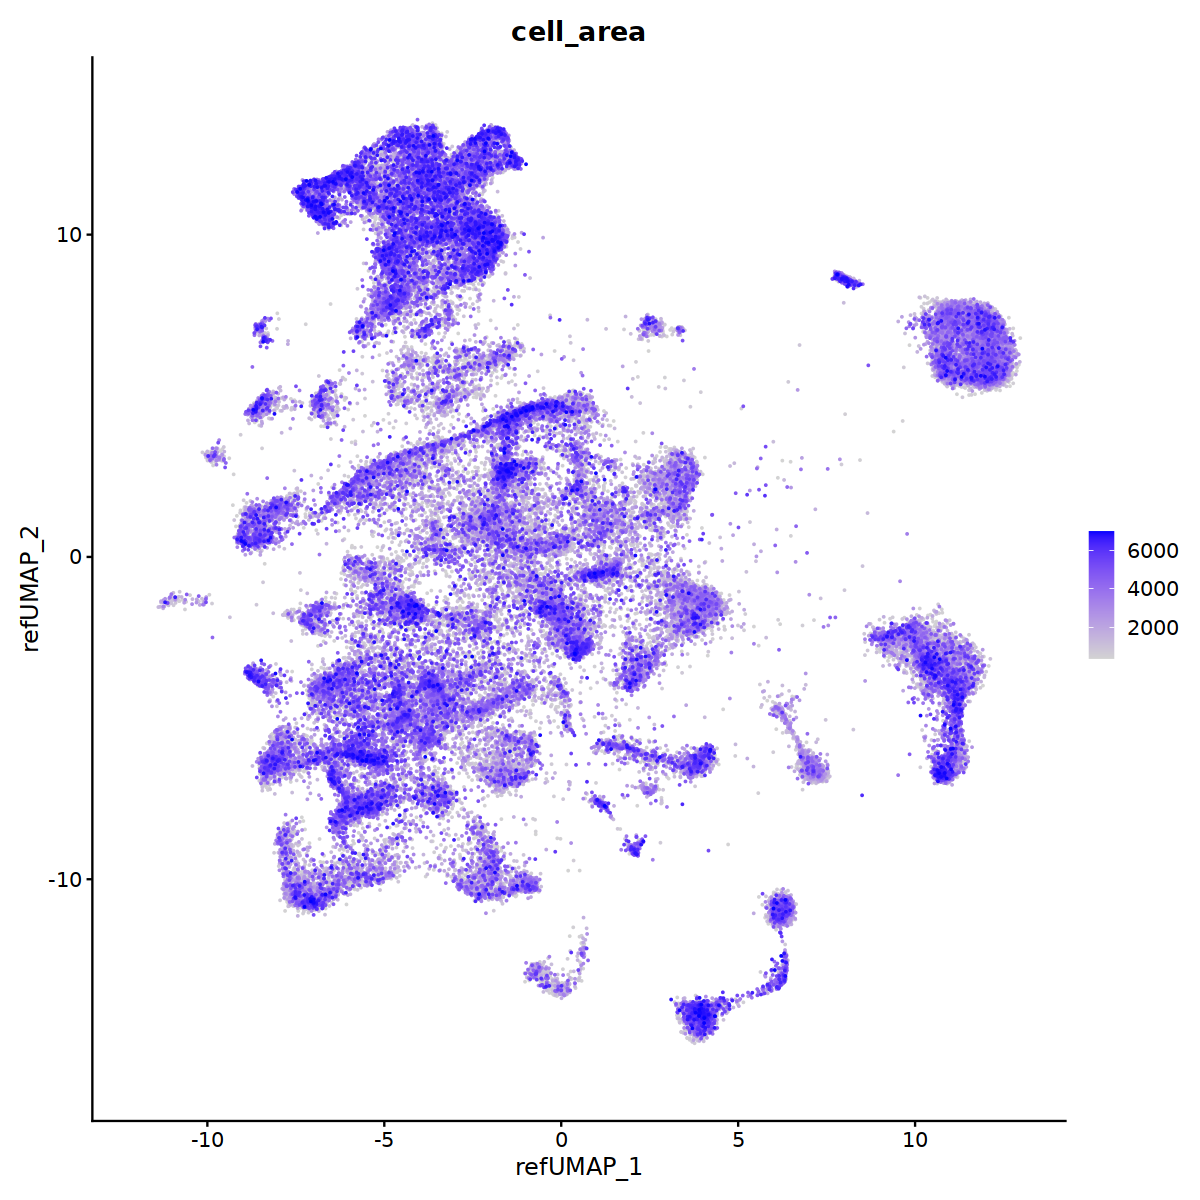

In [8]:
options(repr.plot.width=10, repr.plot.height=10)
FeaturePlot(xenium.obj, c("cell_area"), reduction = "ref.umap", order=TRUE)

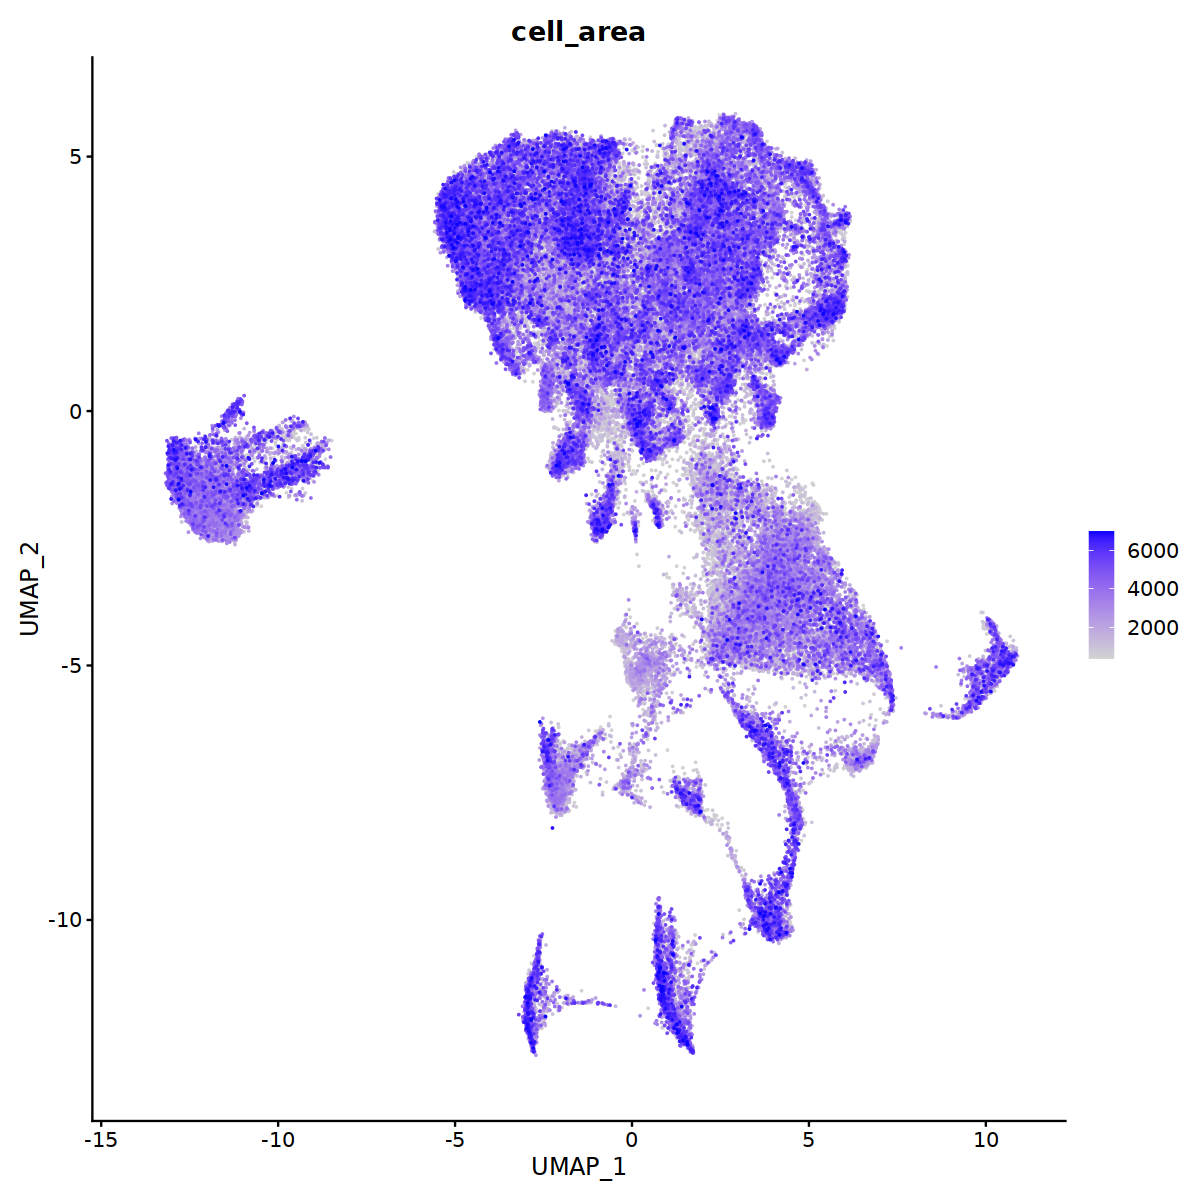

In [9]:
options(repr.plot.width=10, repr.plot.height=10)
FeaturePlot(xenium.obj, c("cell_area"), reduction = "umap", order=TRUE)

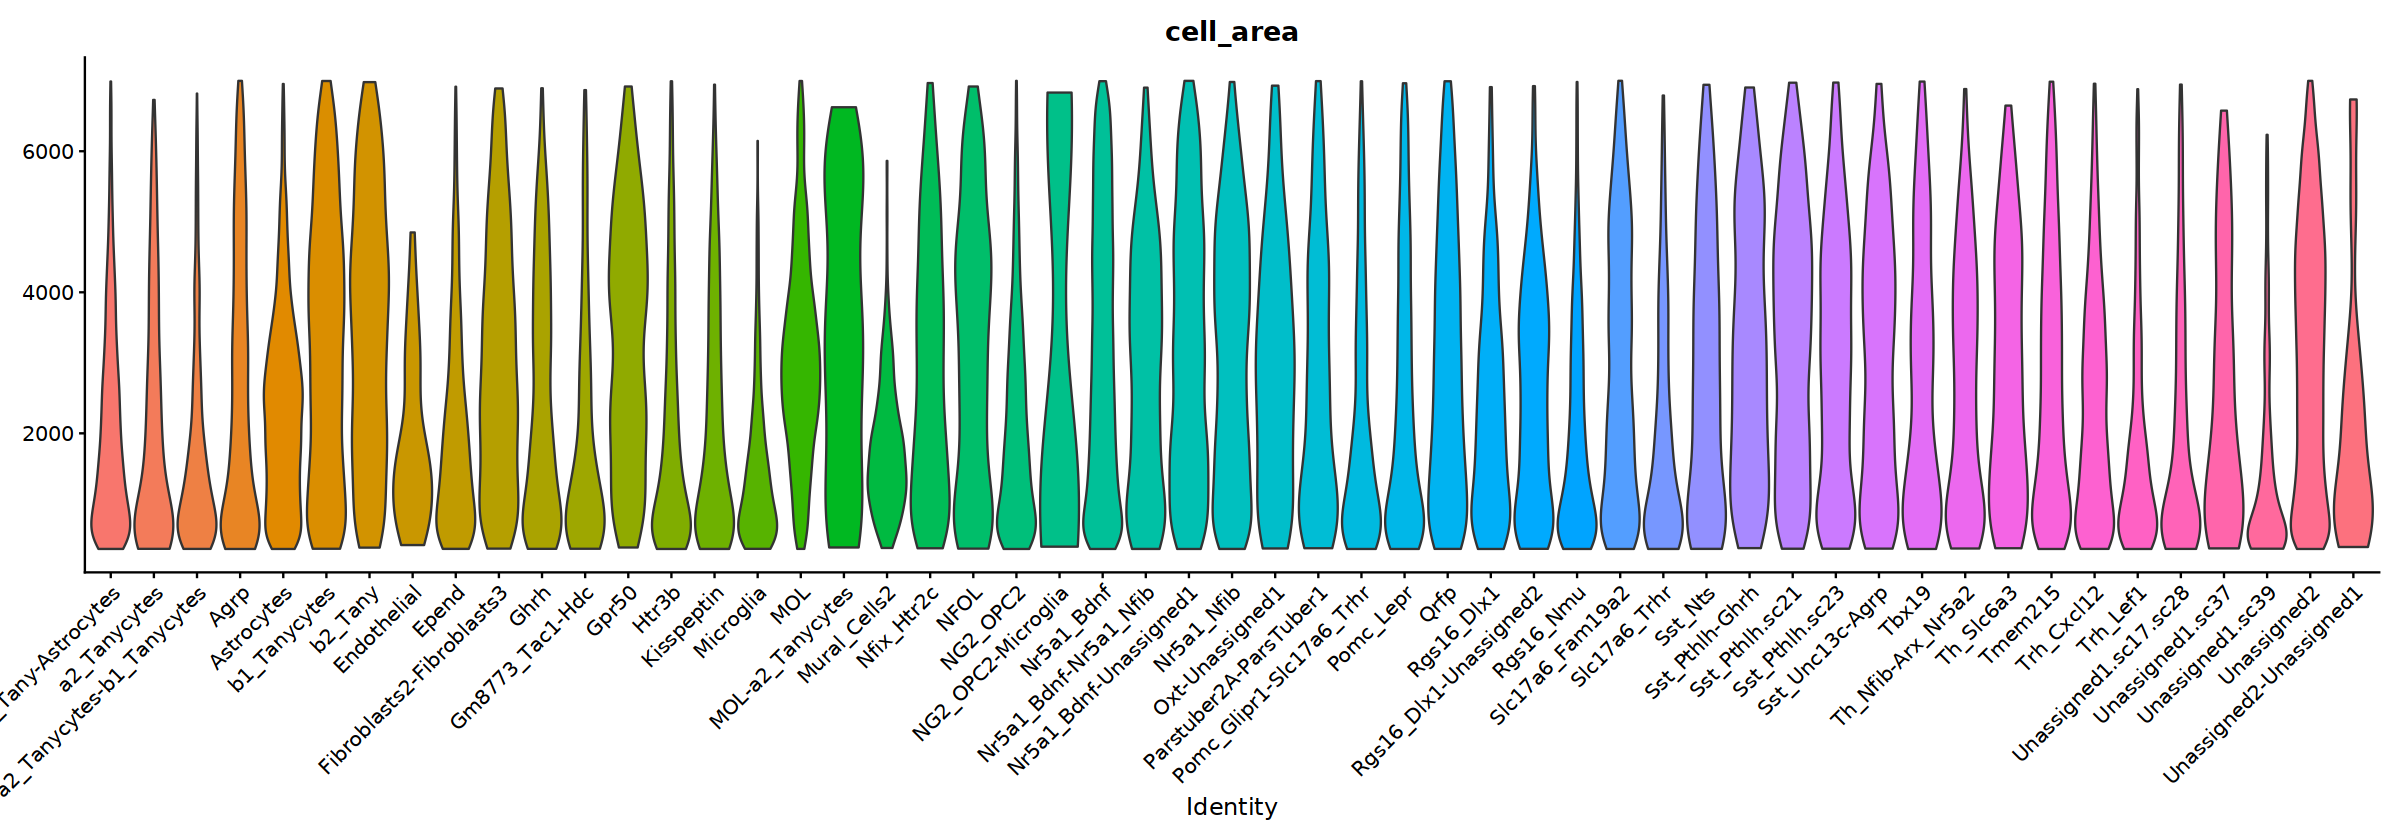

In [10]:
options(repr.plot.width=20, repr.plot.height=7)
VlnPlot(xenium.obj, features = c("cell_area"), pt.size = 0, group.by='predicted.labels') + theme(legend.position = "none")

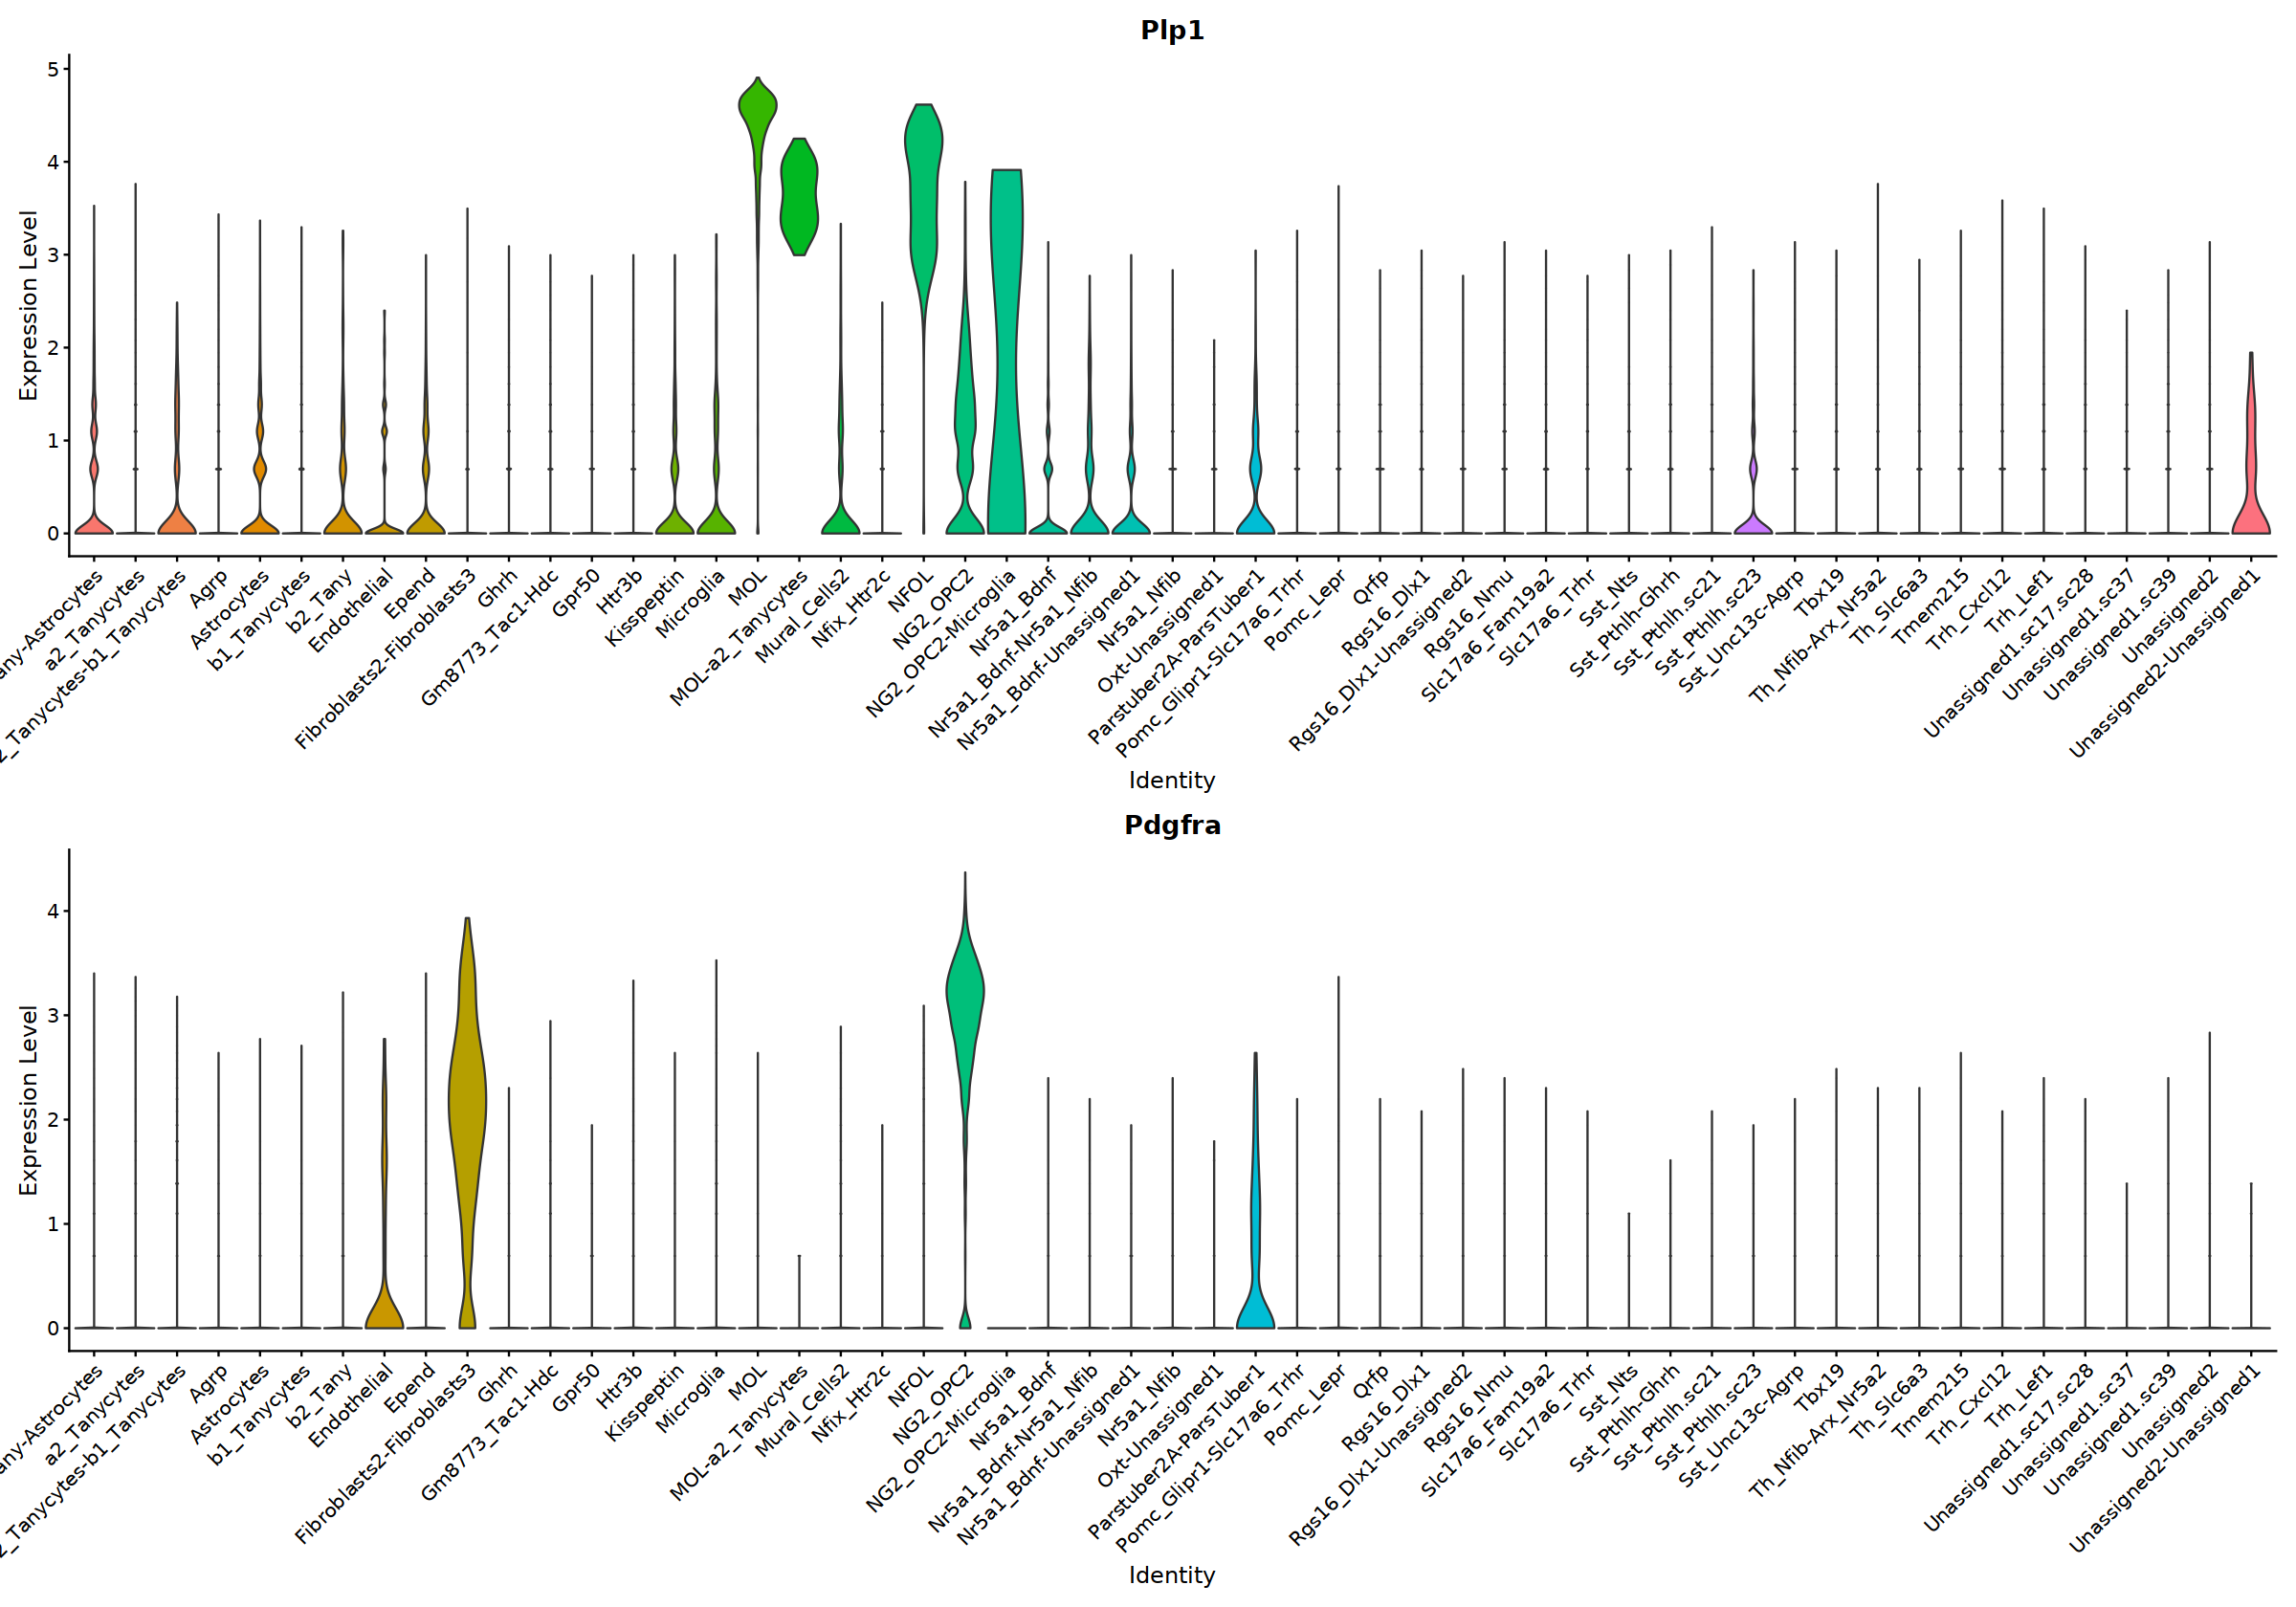

In [11]:
options(repr.plot.width=20, repr.plot.height=14)
VlnPlot(xenium.obj, features = c("Plp1", "Pdgfra"), pt.size = 0, group.by='predicted.labels', ncol=1) + theme(legend.position = "none", )

In [12]:
xenium.obj %>% 
`[[` %>%
group_by(treatment, predicted.labels) %>%
summarise(n = n())

`summarise()` has grouped output by 'treatment'. You can override using the
`.groups` argument.


treatment predicted.labels          n   
1   FGF1      a1_Tany-Astrocytes        2131
2   FGF1      a2_Tanycytes               433
3   FGF1      a2_Tanycytes-b1_Tanycytes  232
4   FGF1      Agrp                      1301
5   FGF1      Astrocytes                2543
6   FGF1      b1_Tanycytes               747
7   FGF1      b2_Tany                    420
8   FGF1      Endothelial                 52
9   FGF1      Epend                      565
10  FGF1      Fibroblasts2-Fibroblasts3  506
11  FGF1      Ghrh                       582
12  FGF1      Gm8773_Tac1-Hdc            286
13  FGF1      Gpr50                      209
14  FGF1      Htr3b                      903
15  FGF1      Kisspeptin                 462
16  FGF1      Microglia                  309
17  FGF1      MOL                       2070
18  FGF1      MOL-a2_Tanycytes            28
19  FGF1      Mural_Cells2               204
20  FGF1      Nfix_Htr2c                 288
21  FGF1      NFOL                       282
22  FGF1      NG2_OPC2                  1084
23  FGF1      NG2_OPC2-Microglia           6
24  FGF1      Nr5a1_Bdnf                6375
25  FGF1      Nr5a1_Bdnf-Nr5a1_Nfib      216
26  FGF1      Nr5a1_Bdnf-Unassigned1     636
27  FGF1      Nr5a1_Nfib                 745
28  FGF1      Oxt-Unassigned1             30
29  FGF1      Parstuber2A-ParsTuber1     222
30  FGF1      Pomc_Glipr1-Slc17a6_Trhr   638
⋮   ⋮         ⋮                         ⋮   
77  Veh_PF    Nr5a1_Bdnf                6443
78  Veh_PF    Nr5a1_Bdnf-Nr5a1_Nfib      230
79  Veh_PF    Nr5a1_Bdnf-Unassigned1     779
80  Veh_PF    Nr5a1_Nfib                 698
81  Veh_PF    Oxt-Unassigned1            137
82  Veh_PF    Parstuber2A-ParsTuber1     153
83  Veh_PF    Pomc_Glipr1-Slc17a6_Trhr   630
84  Veh_PF    Pomc_Lepr                 1070
85  Veh_PF    Qrfp                       550
86  Veh_PF    Rgs16_Dlx1                 304
87  Veh_PF    Rgs16_Dlx1-Unassigned2     384
88  Veh_PF    Rgs16_Nmu                 1024
89  Veh_PF    Slc17a6_Fam19a2            932
90  Veh_PF    Slc17a6_Trhr               367
91  Veh_PF    Sst_Nts                    202
92  Veh_PF    Sst_Pthlh-Ghrh             186
93  Veh_PF    Sst_Pthlh.sc21             577
94  Veh_PF    Sst_Pthlh.sc23             454
95  Veh_PF    Sst_Unc13c-Agrp            351
96  Veh_PF    Tbx19                      307
97  Veh_PF    Th_Nfib-Arx_Nr5a2          266
98  Veh_PF    Th_Slc6a3                  186
99  Veh_PF    Tmem215                    864
100 Veh_PF    Trh_Cxcl12                 906
101 Veh_PF    Trh_Lef1                   533
102 Veh_PF    Unassigned1.sc17.sc28      393
103 Veh_PF    Unassigned1.sc37           104
104 Veh_PF    Unassigned1.sc39           242
105 Veh_PF    Unassigned2               4799
106 Veh_PF    Unassigned2-Unassigned1     25

In [13]:
options(repr.plot.width=20, repr.plot.height=7)
VlnPlot(xenium.obj, features = c("nucleus_area"), pt.size = 0, group.by='predicted.labels', na.rm=TRUE) + theme(legend.position = "none")

ERROR: Error in VlnPlot(xenium.obj, features = c("nucleus_area"), pt.size = 0, : unused argument (na.rm = TRUE)


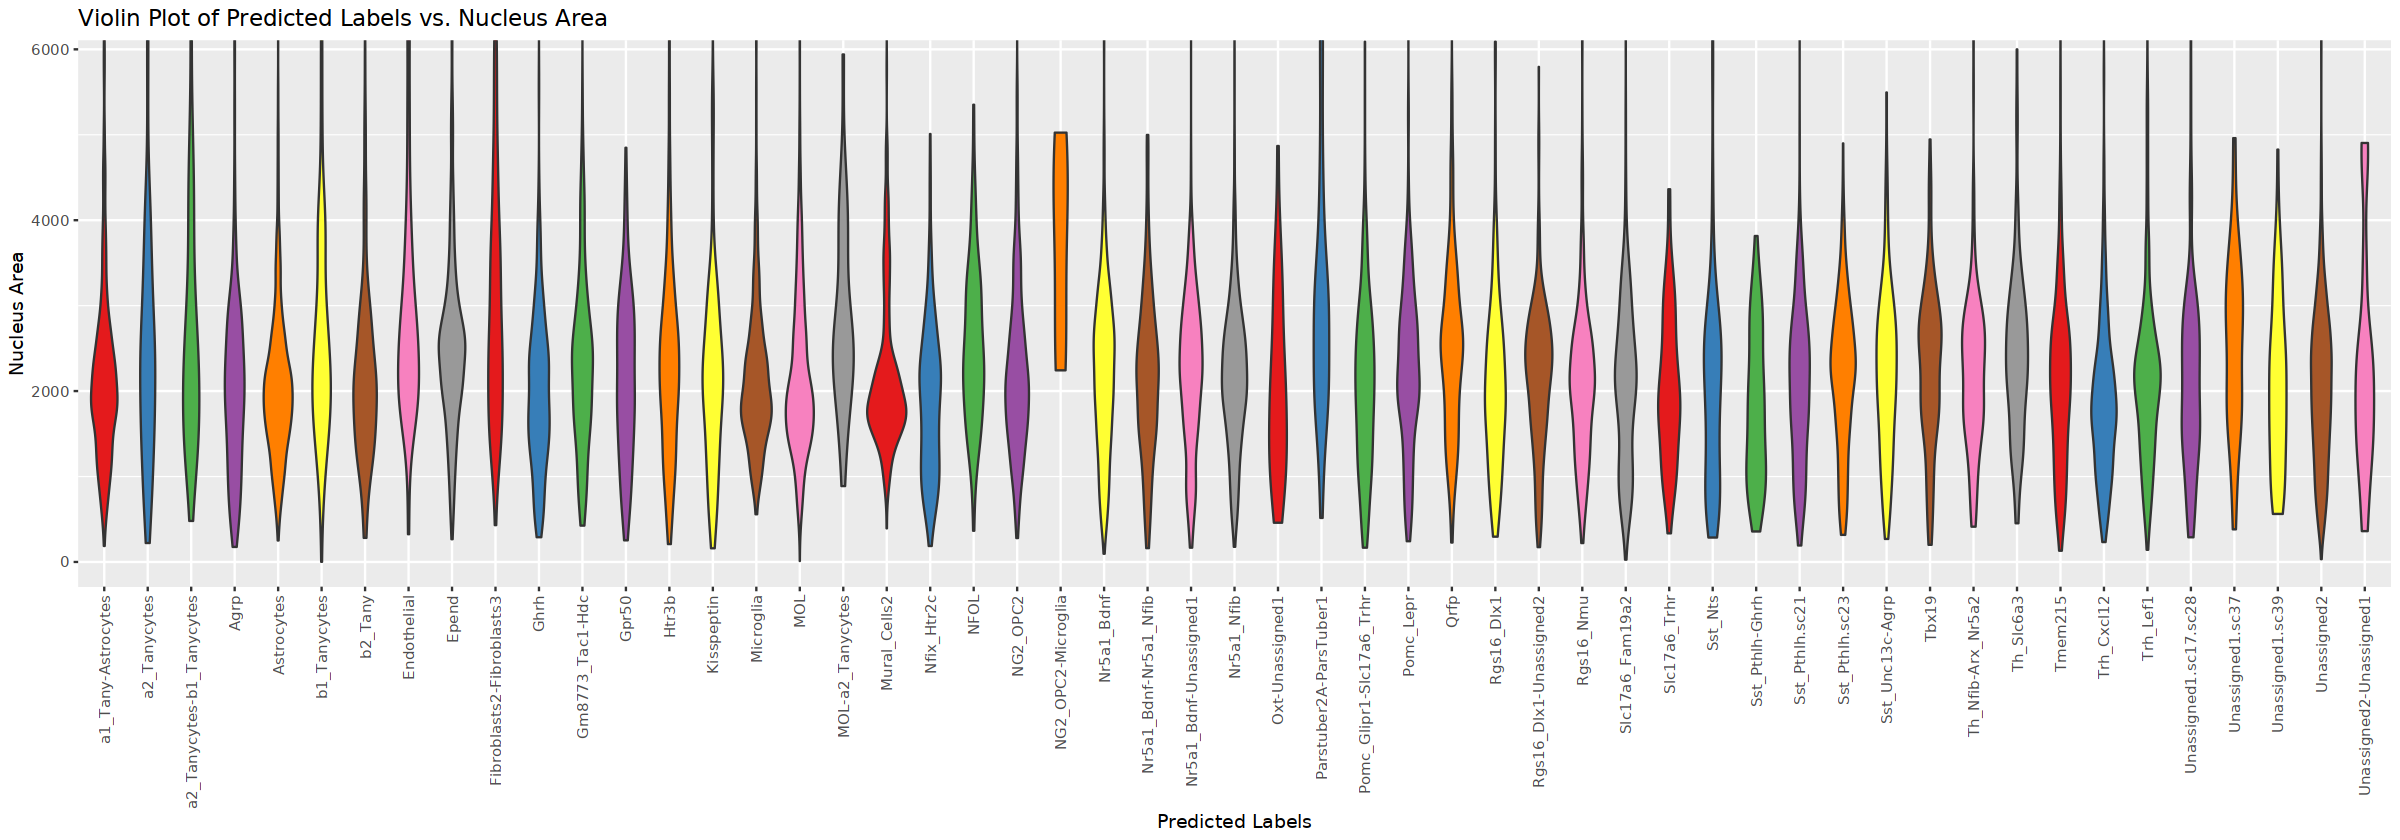

In [14]:
df <- xenium.obj %>% `[[` %>% drop_na(nucleus_area)

# create 53-color palette by repeating colors from Set1
my_palette <- rep(RColorBrewer::brewer.pal(9, "Set1"), length.out = 53)

# create violin plot with custom color scale and rotated x-axis labels
ggplot(df, aes(x = predicted.labels, y = nucleus_area, fill = predicted.labels)) +
  geom_violin() +
  scale_fill_manual(values = my_palette) +
  labs(x = "Predicted Labels", y = "Nucleus Area") +
  ggtitle("Violin Plot of Predicted Labels vs. Nucleus Area") +
    coord_cartesian(ylim = quantile(df$nucleus_area, c(0.0, 0.99))) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ theme(legend.position = "none")

In [15]:
quantile(df$nucleus_area, c(0.0, 0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
                            0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.975, 0.99)) %>% enframe

name  value    
1  0%       1.5000
2  0.1%   178.5000
3  0.5%   287.9225
4  1%     363.5000
5  2%     469.5000
6  3%     549.6900
7  4%     628.5000
8  5%     688.0000
9  6%     741.8800
10 7%     798.6100
11 8%     852.9200
12 9%     898.5000
13 10%    947.0000
14 20%   1343.5000
15 30%   1630.5000
16 40%   1871.0000
17 50%   2096.0000
18 60%   2333.0000
19 70%   2588.5000
20 80%   2892.7000
21 90%   3405.0000
22 95%   3946.0000
23 97.5% 4613.9625
24 99%   5815.3150

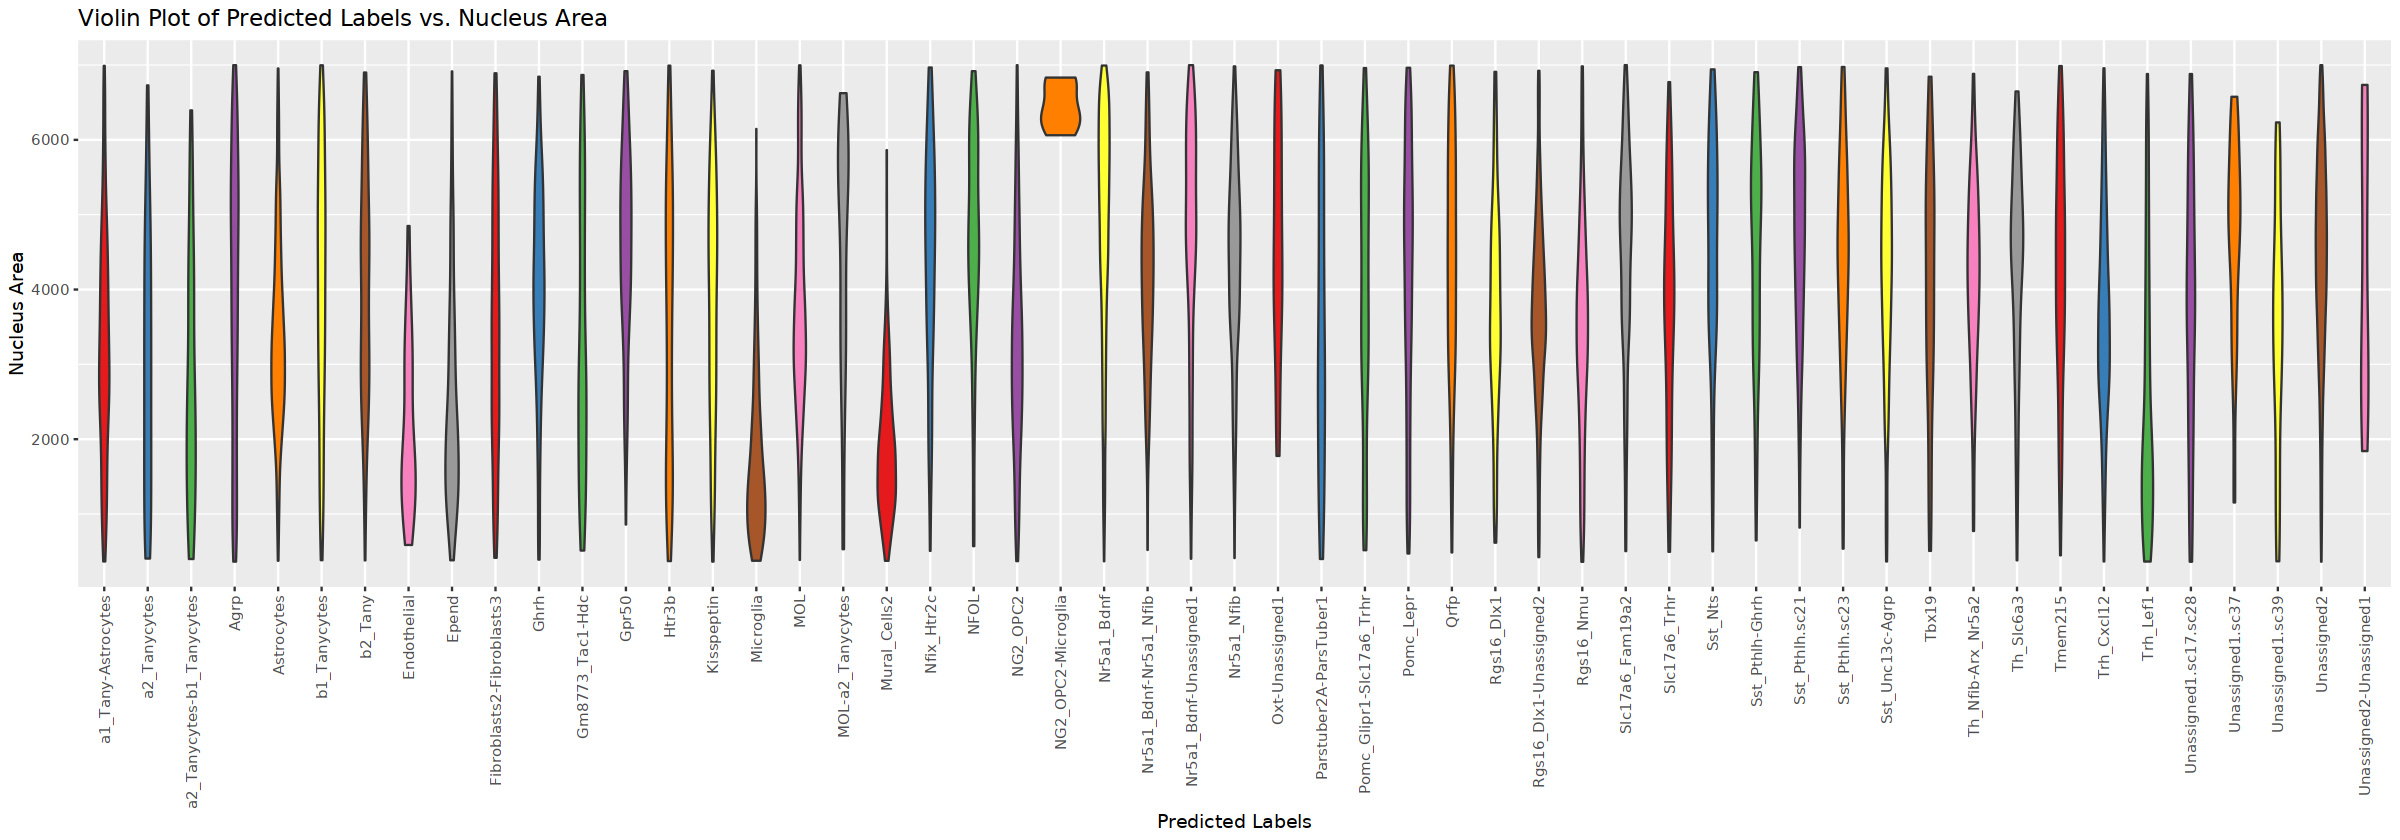

In [16]:
# create 53-color palette by repeating colors from Set1
my_palette <- rep(RColorBrewer::brewer.pal(9, "Set1"), length.out = 53)

# create violin plot with custom color scale and rotated x-axis labels
ggplot(df, aes(x = predicted.labels, y = cell_area, fill = predicted.labels)) +
  geom_violin() +
  scale_fill_manual(values = my_palette) +
  labs(x = "Predicted Labels", y = "Nucleus Area") +
  ggtitle("Violin Plot of Predicted Labels vs. Nucleus Area") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ theme(legend.position = "none")

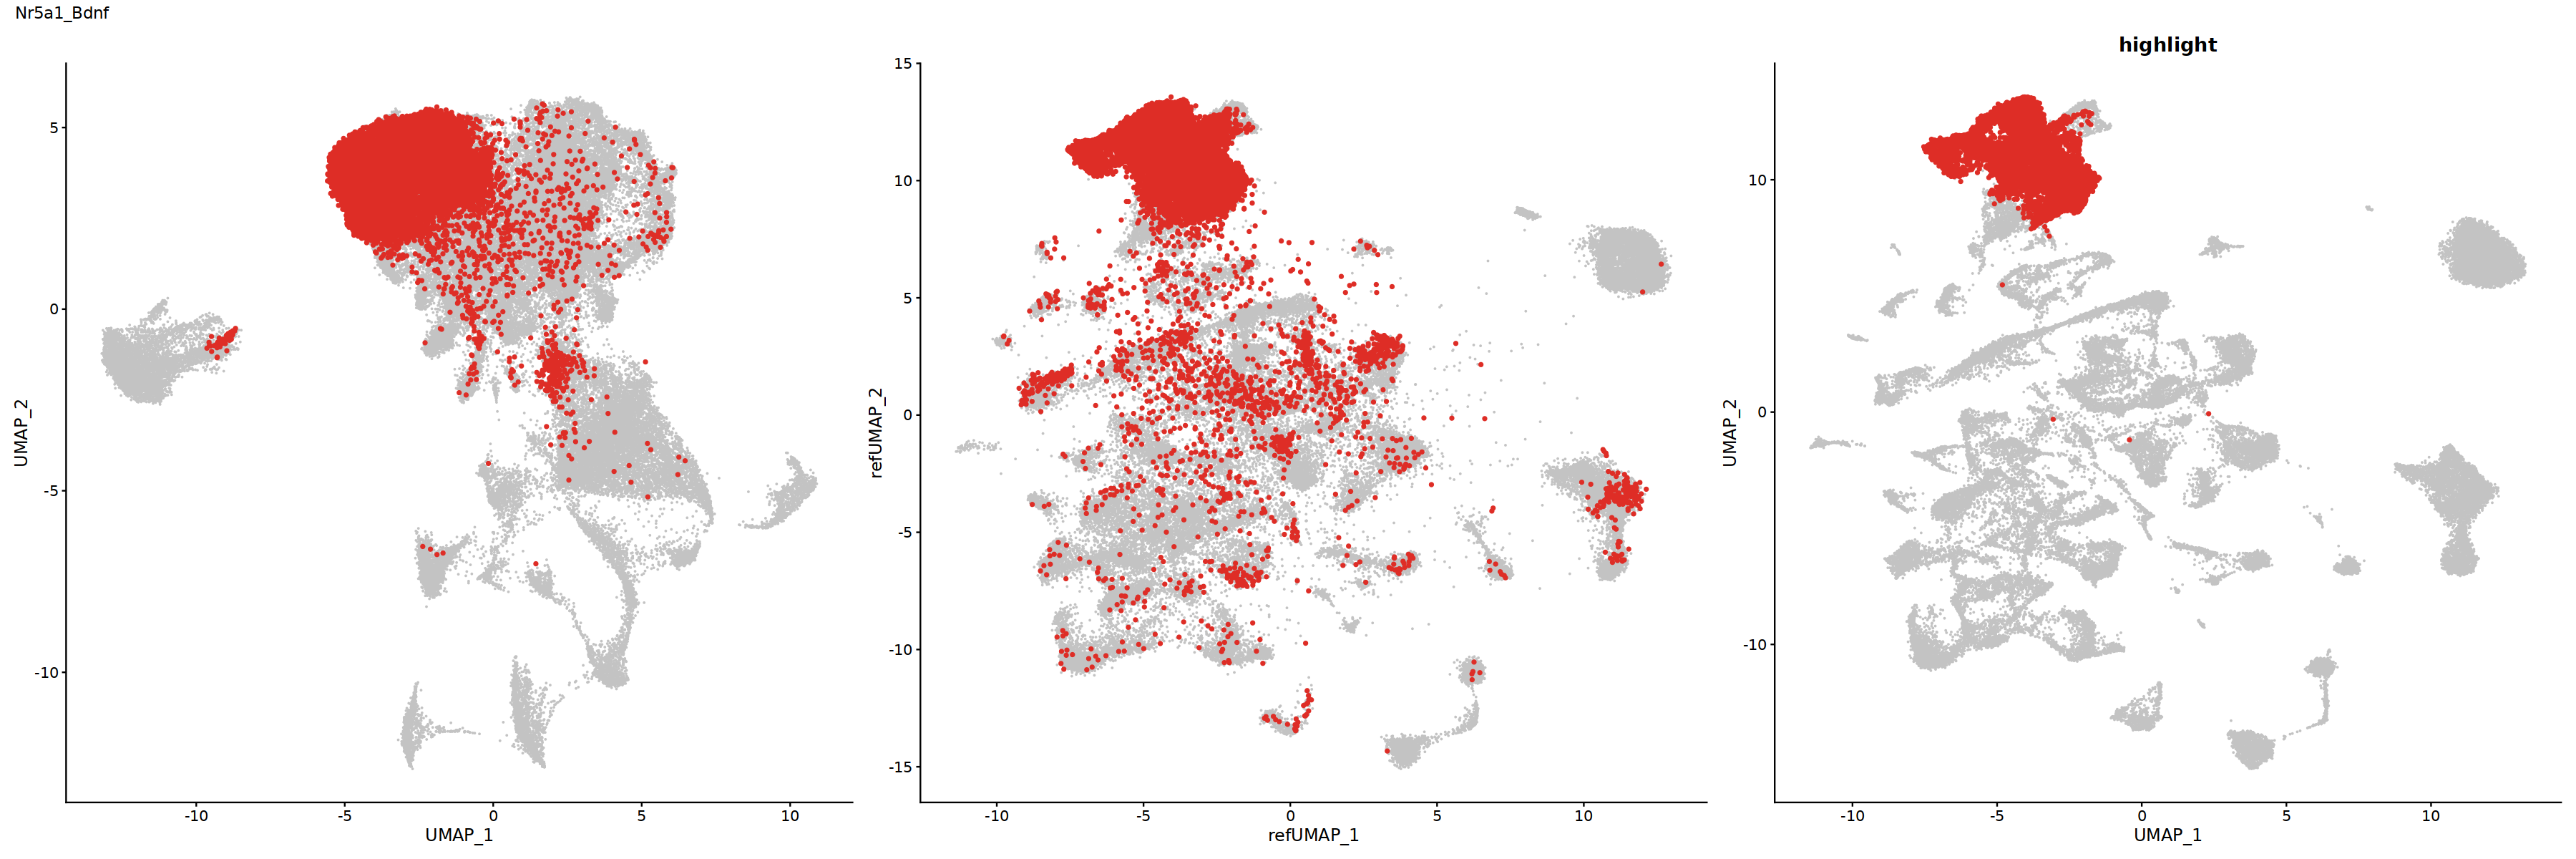

In [17]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'Nr5a1_Bdnf'
highlight_cells_xe = xenium.obj %>%
`[[` %>%
filter(predicted.labels == cell_type) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(labels == cell_type) %>%
rownames
p1 = DimPlot(xenium.obj, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

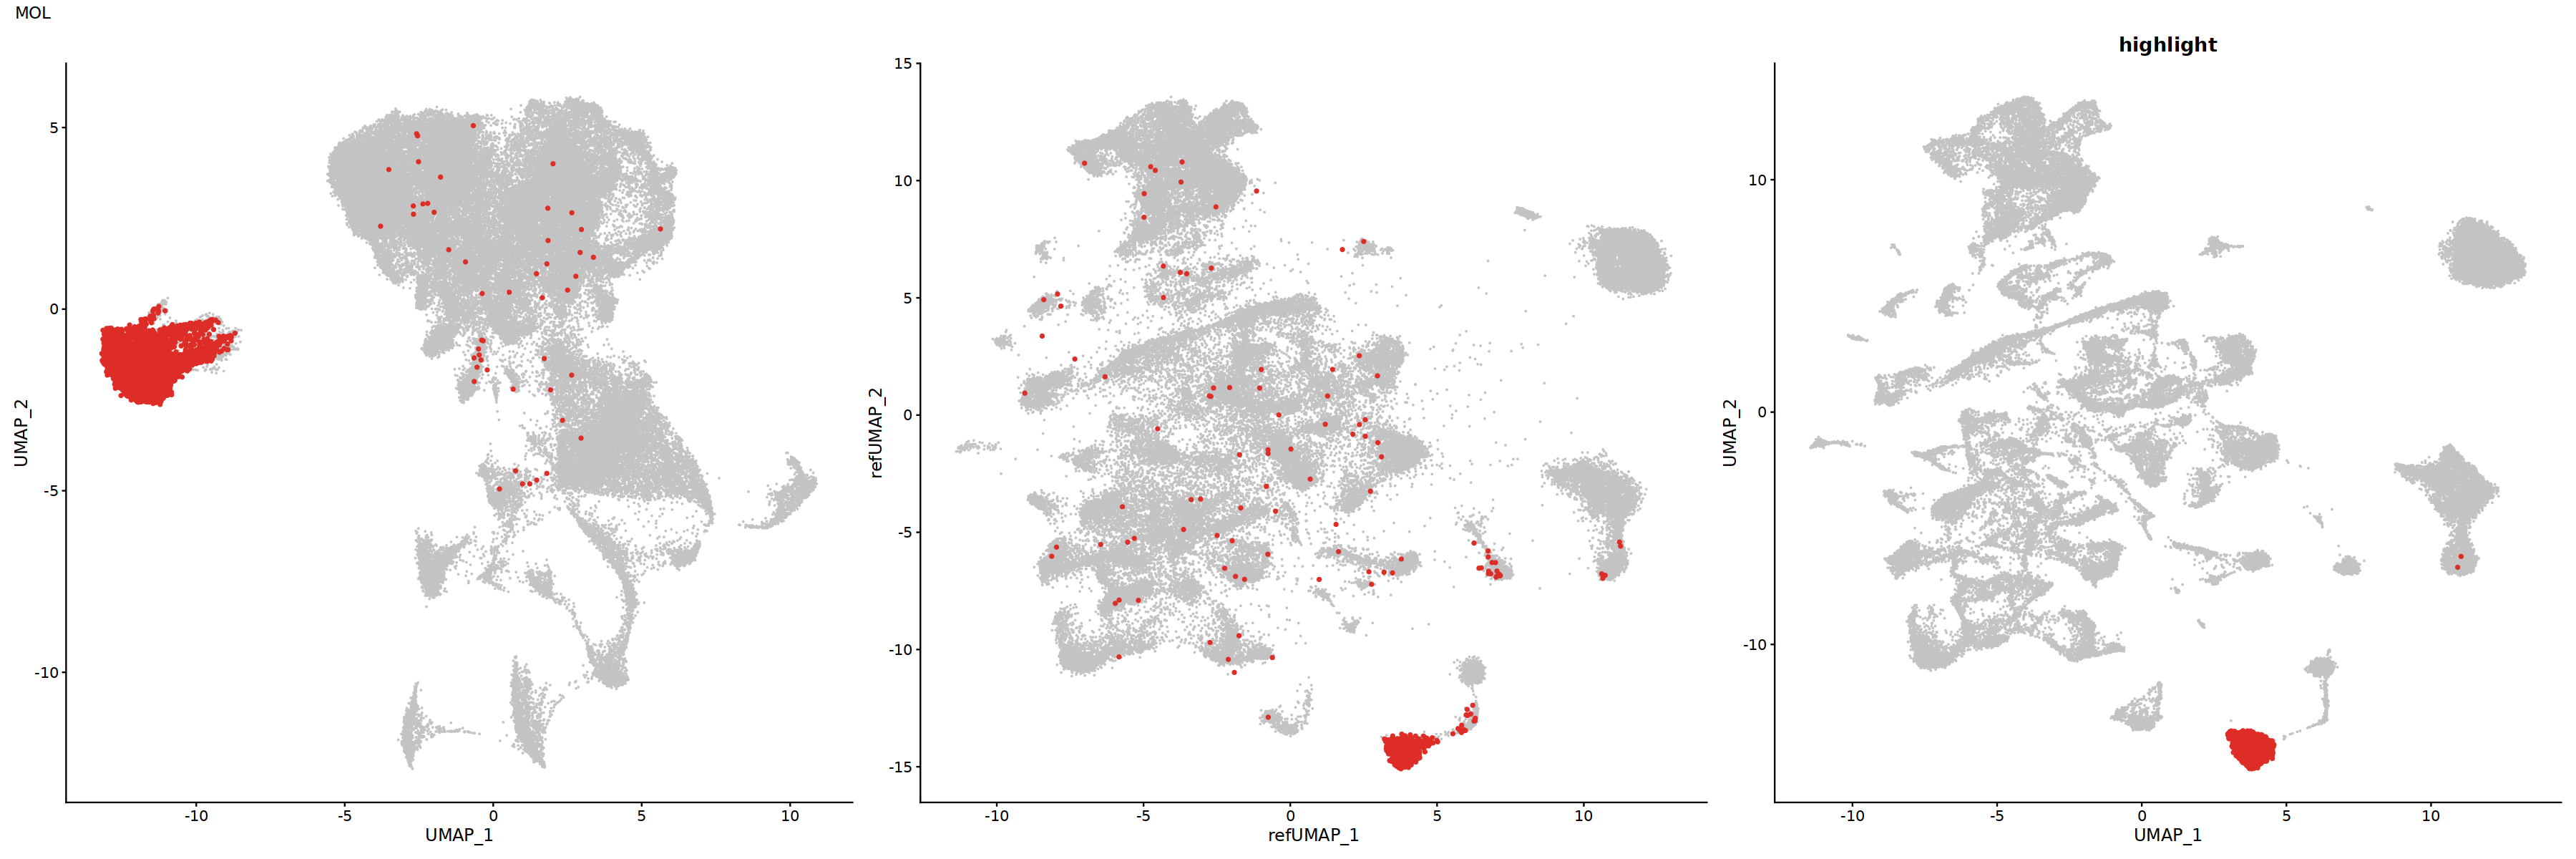

In [18]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'MOL'
highlight_cells_xe = xenium.obj %>%
`[[` %>%
filter(predicted.labels == cell_type) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(labels == cell_type) %>%
rownames
p1 = DimPlot(xenium.obj, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

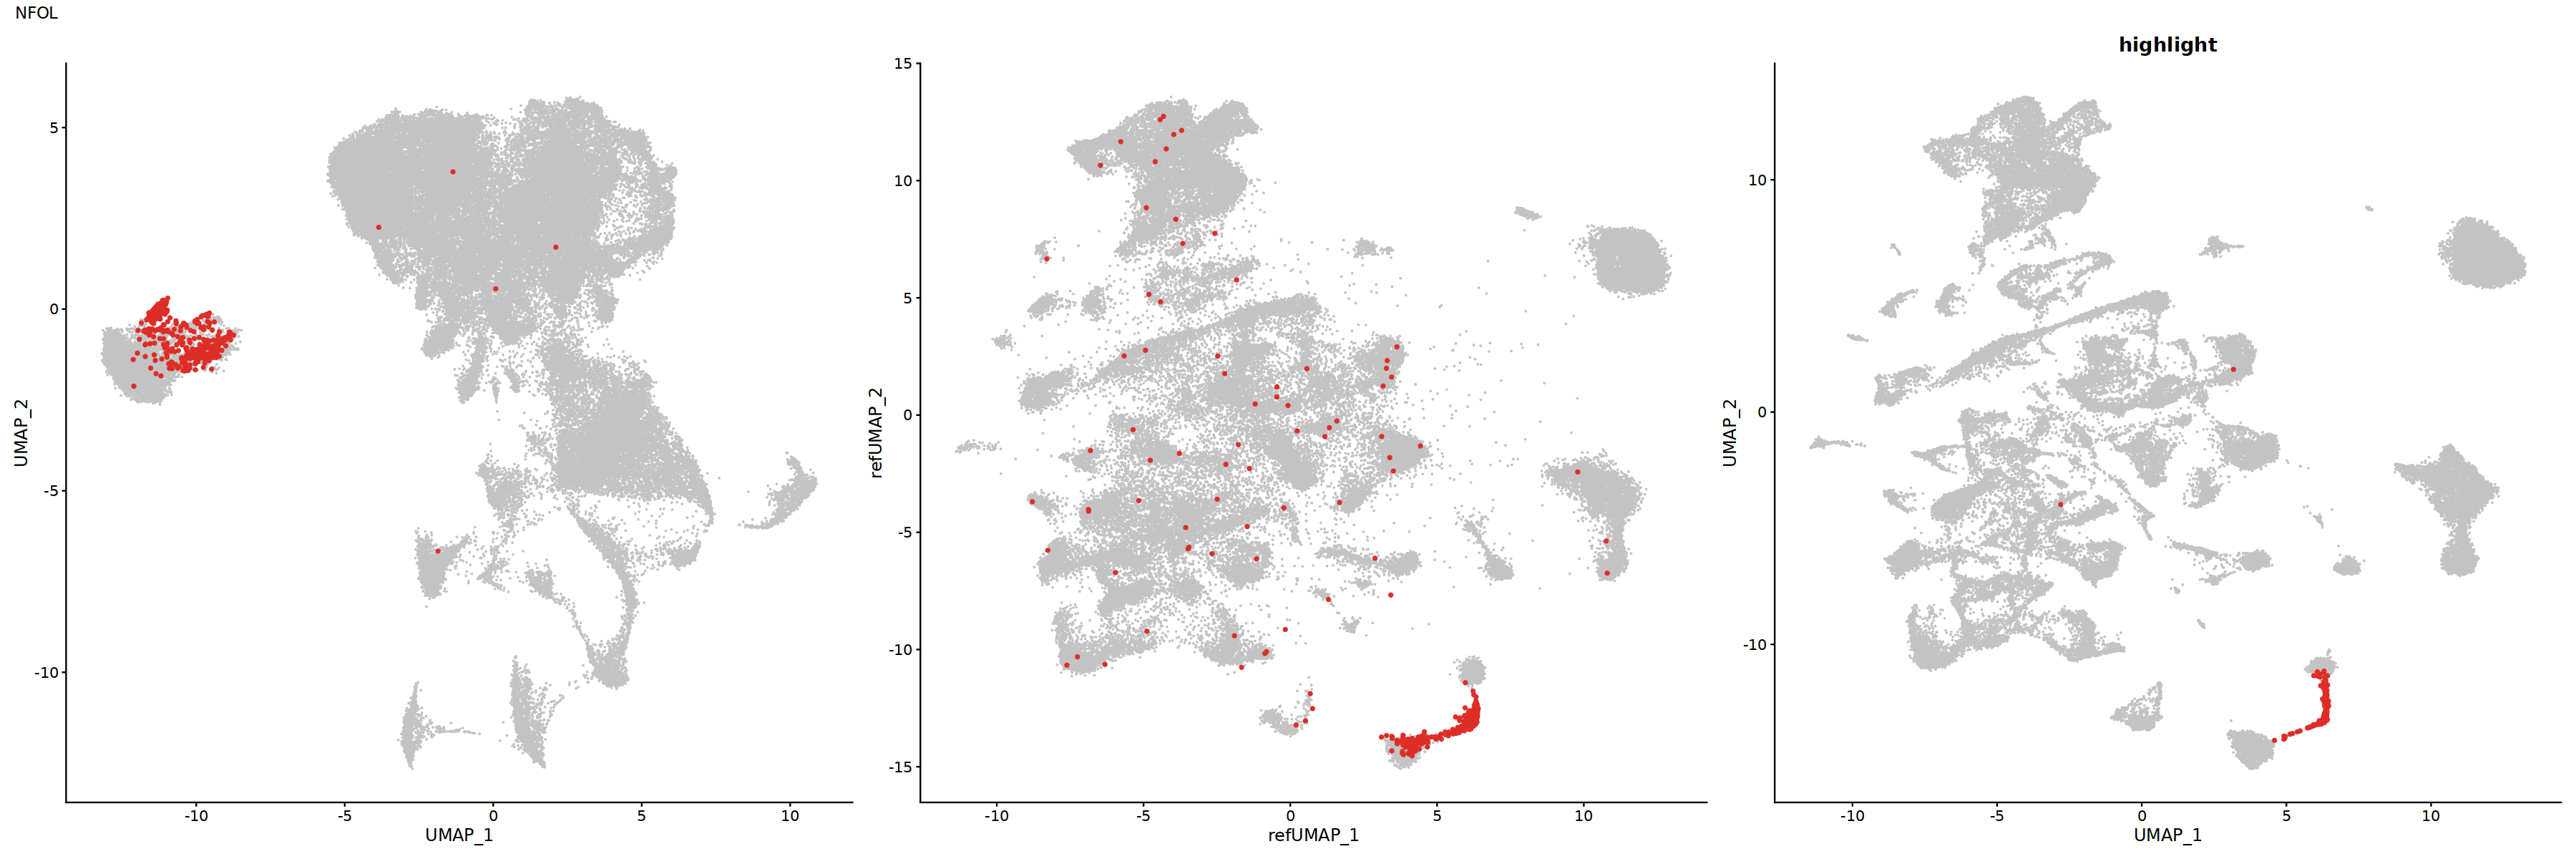

In [19]:
options(repr.plot.width=30, repr.plot.height=10)
cell_type = 'NFOL'
highlight_cells_xe = xenium.obj %>%
`[[` %>%
filter(predicted.labels == cell_type) %>%
rownames
highlight_cells_fgf1 = obj_fgf1 %>%
`[[` %>%
filter(labels == cell_type) %>%
rownames
p1 = DimPlot(xenium.obj, reduction = "umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p2 = DimPlot(xenium.obj, reduction = "ref.umap", cells.highlight = highlight_cells_xe)+ theme(legend.position = "none")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "labels", cells.highlight = highlight_cells_fgf1)+ theme(legend.position = "none")
patchwork = (p1 + p2 + p3)
patchwork + plot_annotation(title = cell_type)

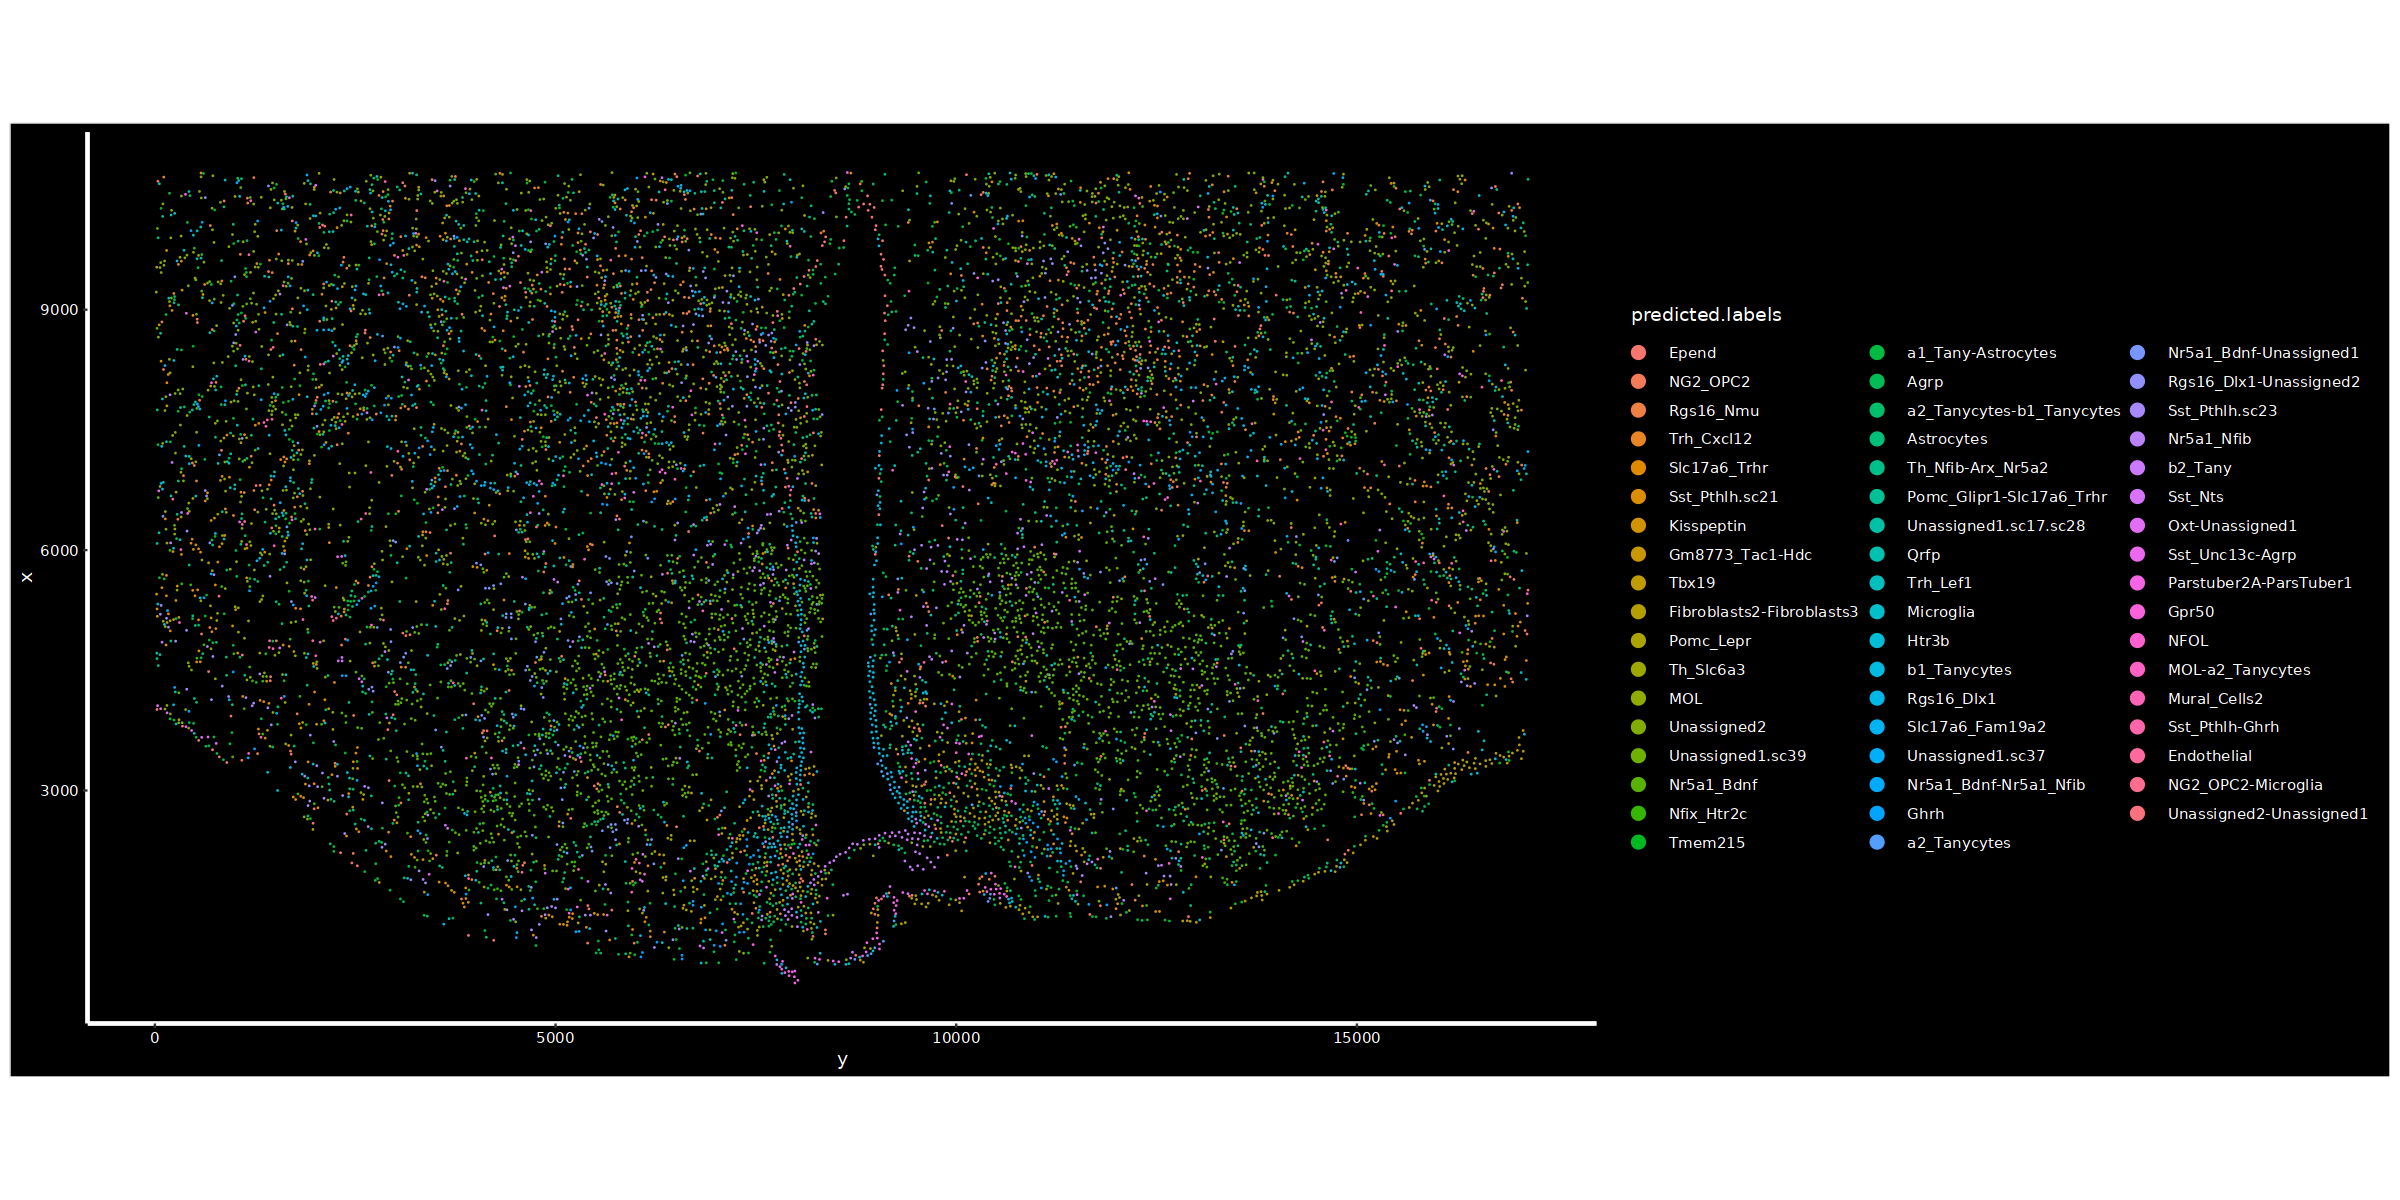

In [20]:
options(repr.plot.width=20, repr.plot.height=10)
ImageDimPlot(xenium.obj, group.by='predicted.labels', fov = "fov", axes = TRUE,)

In [24]:
create_grouping_col <- function(seurat_obj, prefix) {
  new_metadata <- case_when(str_detect(seurat_obj@meta.data$predicted.labels, fixed(prefix)) ~ seurat_obj@meta.data$predicted.labels,
                            TRUE ~ NA_character_) %>% as.factor
  new_metadata = new_metadata %>% fct_relevel(sort(na.omit(levels(new_metadata))), after = Inf)
  return(new_metadata)
}



In [25]:
plot_celltype_idp = function(seurat_obj, cell_str, fov='fov'){
    new_grouping = seurat_obj %>%
        create_grouping_col(cell_str)
    seurat_obj = AddMetaData(seurat_obj, new_grouping, col.name = 'grouping_col')

    # Get the levels of the lab_Pomc column, including the NA_character_ level
    grouping_levels <- levels(seurat_obj@meta.data$grouping_col)
    # Generate colors using the polychrome palette
    how_many_colors = length(grouping_levels)
    colors <- Polychrome::sky.colors(how_many_colors) %>% as.character %>% `[`(1:how_many_colors) # Excluding the NA_character_ level
    # Add 'gray10' for the NA_character_ level
    colors <- c(colors, "gray10")
    # Create a named vector of colors, with levels as names
    named_colors <- setNames(colors, grouping_levels)
    # Map the lab_Pomc column values to the corresponding colors
    # color_vector <- mapvalues(xenium.obj@meta.data$lab_Pomc, from = lab_Pomc_levels, to = named_colors)
    
    ggp = ImageDimPlot(seurat_obj,
                       group.by='grouping_col',
                       boundaries = 'segmentation',
                       fov = fov,
                       border.size =0.1, 
                       border.color =NA,
                       na.value='gray20', 
                       cols=named_colors, 
                       axes = FALSE,
                       size=0)
    ggp
}

In [26]:
make_idp_pdf = function(seurat_obj, cell_type, pdf_folder=""){
    a1 = plot_celltype_idp(seurat_obj, cell_type, fov='fov')  + theme(legend.position = "none")
    a2 = plot_celltype_idp(seurat_obj, cell_type, fov='fov.1') + theme(legend.position = "none")
    b1 = plot_celltype_idp(seurat_obj, cell_type, fov='fov.2') + theme(legend.position = "none")
    b2 = plot_celltype_idp(seurat_obj, cell_type, fov='fov.3') + theme(legend.position = "none")
    c1 = plot_celltype_idp(seurat_obj, cell_type, fov='fov.4') + theme(legend.position = "none")
    c2 = plot_celltype_idp(seurat_obj, cell_type, fov='fov.5') + theme(legend.position = "none")
    d1 = plot_celltype_idp(seurat_obj, cell_type, fov='fov.6') + theme(legend.position = "none")
    d2 = plot_celltype_idp(seurat_obj, cell_type, fov='fov.7') + theme(legend.position = "none")
    title_theme <- theme(plot.title = element_text(color = "white", size = 8, hjust = 0.5))
    # Set black background theme for each plot
    legend_theme <- theme(legend.position = "bottom",
                          legend.direction = "horizontal",
                          legend.box = "horizontal",
                          legend.text = element_text(size = 4),
                          legend.key.size = unit(2, "mm"))
    # black_background_theme <- theme(plot.background = element_rect(fill = "black"),
    #                                 panel.background = element_rect(fill = "black"))
    black_background_theme <- theme(plot.background = element_rect(fill = "black", color = 'black'),
                          panel.background = element_rect(fill = "black", color = 'black'),
                          plot.margin = margin(0, 0, 0, 0),
                          panel.grid.major = element_blank(),
                          panel.grid.minor = element_blank(),
                          panel.border = element_blank())

    a1_with_title <- a1 + theme(legend.position = "right") + ggtitle("a1_Veh_PF") + title_theme + legend_theme + black_background_theme
    a2_no_legend_with_title <- a2 + guides(scale="none") + ggtitle("a2_Veh_PF") + title_theme + black_background_theme
    b1_no_legend_with_title <- b1 + guides(scale="none") + ggtitle("b1_Veh_PF") + title_theme + black_background_theme
    b2_no_legend_with_title <- b2 + guides(scale="none") + ggtitle("b2_Veh_PF") + title_theme + black_background_theme
    c1_no_legend_with_title <- c1 + guides(scale="none") + ggtitle("c1_FGF1") + title_theme + black_background_theme
    c2_no_legend_with_title <- c2 + guides(scale="none") + ggtitle("c2_FGF1") + title_theme + black_background_theme
    d1_no_legend_with_title <- d1 + guides(scale="none") + ggtitle("d1_FGF1") + title_theme + black_background_theme
    d2_no_legend_with_title <- d2 + guides(scale="none") + ggtitle("d2_FGF1") + title_theme + black_background_theme

    # Combine the plots using patchwork with a black background
    combined_plots <- a1_with_title + c1_no_legend_with_title +
                      a2_no_legend_with_title + c2_no_legend_with_title +
                      b1_no_legend_with_title + d1_no_legend_with_title +
                      b2_no_legend_with_title + d2_no_legend_with_title +
                      plot_layout(guides = "collect", ncol = 2, heights = c(1, 1, 1, 1), widths = c(1, 1))

    # combined_plots = combined_plots & black_background_theme & legend_theme 
    combined_plots = combined_plots + plot_annotation(title=cell_type, theme=black_background_theme) + plot_annotation(theme=legend_theme) + plot_annotation(theme=title_theme)
    # Save the combined_plots to a PDF with a black background
    pdf_name = paste0(pdf_folder, cell_type, '_ct_mapping.pdf')
    pdf(pdf_name, width = 8.27, height = 11.69, bg = "black")
    # grid.newpage()
    grid.draw(combined_plots)
    dev.off()
}

In [27]:
cell_types = xenium.obj %>% `[[` %>% group_by(predicted.labels) %>% summarise(n = n()) %>% arrange(desc(n)) %>% pull(predicted.labels) %>% unique
cell_types

[1] "Nr5a1_Bdnf"                "Unassigned2"              
 [3] "Astrocytes"                "MOL"                      
 [5] "a1_Tany-Astrocytes"        "Agrp"                     
 [7] "NG2_OPC2"                  "Slc17a6_Fam19a2"          
 [9] "Pomc_Lepr"                 "Rgs16_Nmu"                
[11] "Htr3b"                     "Trh_Cxcl12"               
[13] "Tmem215"                   "Nr5a1_Nfib"               
[15] "Nr5a1_Bdnf-Unassigned1"    "b1_Tanycytes"             
[17] "Pomc_Glipr1-Slc17a6_Trhr"  "Epend"                    
[19] "Ghrh"                      "Sst_Pthlh.sc21"           
[21] "Trh_Lef1"                  "Kisspeptin"               
[23] "Qrfp"                      "Fibroblasts2-Fibroblasts3"
[25] "Sst_Pthlh.sc23"            "Unassigned1.sc17.sc28"    
[27] "Rgs16_Dlx1-Unassigned2"    "Sst_Unc13c-Agrp"          
[29] "a2_Tanycytes"              "b2_Tany"                  
[31] "Slc17a6_Trhr"              "Nfix_Htr2c"               
[33] "Microglia"                 "a2_Tanycytes-b1_Tanycytes"
[35] "Gm8773_Tac1-Hdc"           "Rgs16_Dlx1"               
[37] "Tbx19"                     "Th_Nfib-Arx_Nr5a2"        
[39] "Unassigned1.sc39"          "Gpr50"                    
[41] "Nr5a1_Bdnf-Nr5a1_Nfib"     "Mural_Cells2"             
[43] "NFOL"                      "Parstuber2A-ParsTuber1"   
[45] "Sst_Nts"                   "Th_Slc6a3"                
[47] "Sst_Pthlh-Ghrh"            "Unassigned1.sc37"         
[49] "Oxt-Unassigned1"           "Endothelial"              
[51] "MOL-a2_Tanycytes"          "Unassigned2-Unassigned1"  
[53] "NG2_OPC2-Microglia"

In [31]:
for (cell_type in cell_types){
    print(cell_type)
    make_idp_pdf(xenium.obj, cell_type, pdf_folder="ct_mapping_230502_xenium_sct_unimapped_cca/")
}

[1] "Nr5a1_Bdnf"
[1] "Unassigned2"
[1] "Astrocytes"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "MOL"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "a1_Tany-Astrocytes"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Agrp"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "NG2_OPC2"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Slc17a6_Fam19a2"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Pomc_Lepr"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Rgs16_Nmu"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Htr3b"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Trh_Cxcl12"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Tmem215"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Nr5a1_Nfib"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Nr5a1_Bdnf-Unassigned1"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "b1_Tanycytes"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Pomc_Glipr1-Slc17a6_Trhr"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Epend"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Ghrh"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Sst_Pthlh.sc21"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Trh_Lef1"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Kisspeptin"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Qrfp"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Fibroblasts2-Fibroblasts3"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Sst_Pthlh.sc23"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Unassigned1.sc17.sc28"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Rgs16_Dlx1-Unassigned2"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Sst_Unc13c-Agrp"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "a2_Tanycytes"
[1] "b2_Tany"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Slc17a6_Trhr"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Nfix_Htr2c"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Microglia"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "a2_Tanycytes-b1_Tanycytes"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Gm8773_Tac1-Hdc"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Rgs16_Dlx1"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Tbx19"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Th_Nfib-Arx_Nr5a2"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Unassigned1.sc39"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Gpr50"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Nr5a1_Bdnf-Nr5a1_Nfib"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Mural_Cells2"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "NFOL"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Parstuber2A-ParsTuber1"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Sst_Nts"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Th_Slc6a3"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Sst_Pthlh-Ghrh"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Unassigned1.sc37"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Oxt-Unassigned1"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Endothelial"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "MOL-a2_Tanycytes"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Unassigned2-Unassigned1"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "NG2_OPC2-Microglia"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


In [32]:
make_idp_pdf(xenium.obj, "Tany", pdf_folder="ct_mapping_230502_xenium_sct_unimapped_cca/")

png 
  2

In [2]:
hdf5r::h5version()

hdf5r version 1.3.6 with C-library HDF5 Version  1.12.2 


[1] "1.12.2"